In [30]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [31]:
from tensorflow import keras
(train_images, train_labels),(val_images,val_labels)=keras.datasets.cifar10.load_data()

In [32]:
!pip install tensorflow

In [33]:
import matplotlib.pyplot as plt
from tensorflow import keras

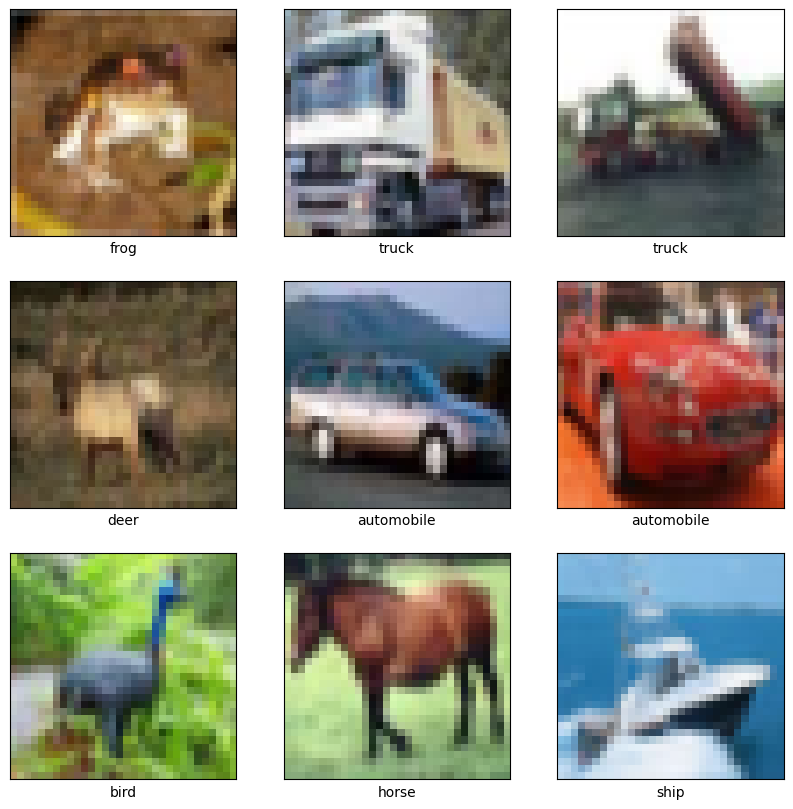

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i][0]])
    plt.show()

plot_images(train_images, train_labels)




In [35]:
train_images.shape

(50000, 32, 32, 3)

In [36]:
train_images.min(), train_images.max()

(0, 255)

In [37]:
train_labels.shape

(50000, 1)

In [38]:
train_images = train_images / 255.0
val_images = val_images / 255.0

In [39]:
width, height=(32, 32)
n_hidden_neurons=100
n_bias=100
n_input_items=width * height*3
n_parametrs=(n_input_items+n_hidden_neurons)+n_bias

In [40]:
inputs=keras.Input(shape=n_input_items)
outputs=keras.layers.Dense(100)(inputs)
model=keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_7 (Dense)             (None, 100)               307300    
                                                                 
Total params: 307300 (1.17 MB)
Trainable params: 307300 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
def create_nn():
  inputs=keras.Input(shape=train_images.shape[1:])
  x=keras.layers.Conv2D(50,(3,3), activation='relu')(inputs)
  x = keras.layers.MaxPooling2D((2, 2))(x)
  x=keras.layers.Conv2D(50,(3,3), activation='relu')(inputs)
  x = keras.layers.MaxPooling2D((2, 2))(x)
  x=keras.layers.Conv2D(50,(3,3), activation='relu')(inputs)
  x=keras.layers.Flatten()(x)
  x=keras.layers.Dense(50, activation='relu')(x)
  outputs=keras.layers.Dense(10)(x)

  model= keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
  return model

model=create_nn()

In [19]:
model.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 flatten_1 (Flatten)         (None, 45000)             0         
                                                                 
 dense_3 (Dense)             (None, 50)                2250050   
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 2251960 (8.59 MB)
Trainable params: 2251960 (8.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
compile_model(model)

In [21]:
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))

Epoch 1/20
1563/1563 [==============================] - 100s 63ms/step - loss: 1.5081 - accuracy: 0.4618 - val_loss: 1.2708 - val_accuracy: 0.5504
Epoch 2/20
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1993 - accuracy: 0.5791 - val_loss: 1.1809 - val_accuracy: 0.5867
Epoch 3/20
1563/1563 [==============================] - 91s 58ms/step - loss: 1.0616 - accuracy: 0.6291 - val_loss: 1.1735 - val_accuracy: 0.5908
Epoch 4/20
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9534 - accuracy: 0.6659 - val_loss: 1.1474 - val_accuracy: 0.6041
Epoch 5/20
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8640 - accuracy: 0.7005 - val_loss: 1.2076 - val_accuracy: 0.5918
Epoch 6/20
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7867 - accuracy: 0.7278 - val_loss: 1.2140 - val_accuracy: 0.5986
Epoch 7/20
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7117 - accuracy: 0.7534 - val_loss: 1.2600 

313/313 - 4s - loss: 2.5762 - accuracy: 0.5762 - 4s/epoch - 12ms/step


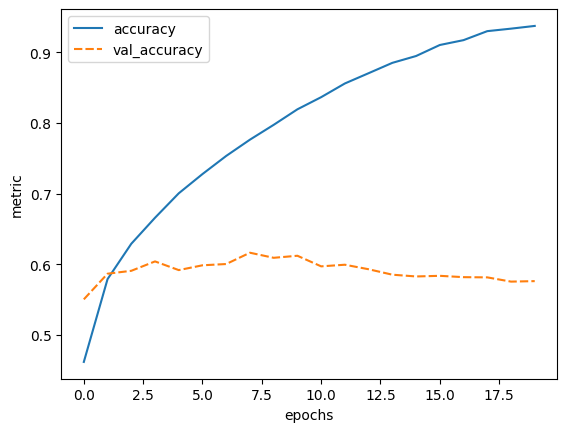

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history, metrics):

    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")
plot_history(history, ['accuracy', 'val_accuracy'])
val_loss, val_acc = model.evaluate(val_images,  val_labels, verbose=2)

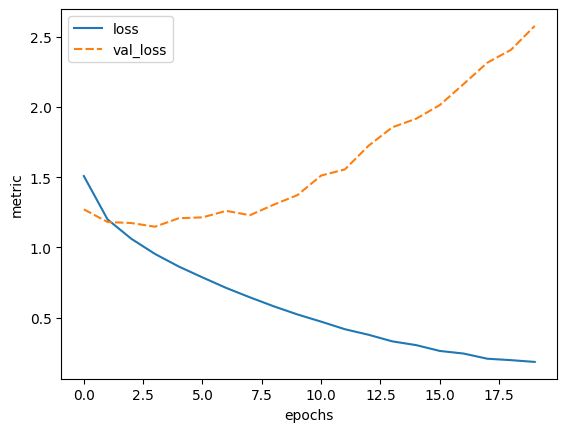

In [23]:
plot_history(history, ['loss', 'val_loss'])

In [42]:
def create_nn_with_dropout():
    inputs = keras.Input(shape=train_images.shape[1:])
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
    x = keras.layers.Dropout(0.8)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(50, activation='relu')(x)
    outputs = keras.layers.Dense(10)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
    return model

model_dropout = create_nn_with_dropout()
model_dropout.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 50)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 50)          

In [25]:
compile_model(model_dropout)

history = model_dropout.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels))

Epoch 1/20
1563/1563 [==============================] - 106s 66ms/step - loss: 1.7907 - accuracy: 0.3246 - val_loss: 1.4328 - val_accuracy: 0.4842
Epoch 2/20
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4831 - accuracy: 0.4567 - val_loss: 1.3134 - val_accuracy: 0.5212
Epoch 3/20
1563/1563 [==============================] - 103s 66ms/step - loss: 1.3832 - accuracy: 0.4973 - val_loss: 1.2272 - val_accuracy: 0.5587
Epoch 4/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.3131 - accuracy: 0.5248 - val_loss: 1.1750 - val_accuracy: 0.5821
Epoch 5/20
1563/1563 [==============================] - 106s 68ms/step - loss: 1.2568 - accuracy: 0.5509 - val_loss: 1.1056 - val_accuracy: 0.6131
Epoch 6/20
1563/1563 [==============================] - 100s 64ms/step - loss: 1.2245 - accuracy: 0.5630 - val_loss: 1.0952 - val_accuracy: 0.6172
Epoch 7/20
1563/1563 [==============================] - 106s 68ms/step - loss: 1.1851 - accuracy: 0.5761 - val_loss: 1

313/313 - 5s - loss: 0.9018 - accuracy: 0.6843 - 5s/epoch - 17ms/step


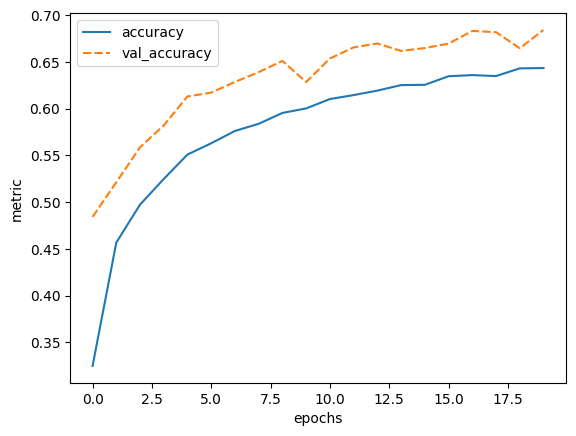

In [26]:
plot_history(history, ['accuracy', 'val_accuracy'])

val_loss, val_acc = model_dropout.evaluate(val_images,  val_labels, verbose=2)

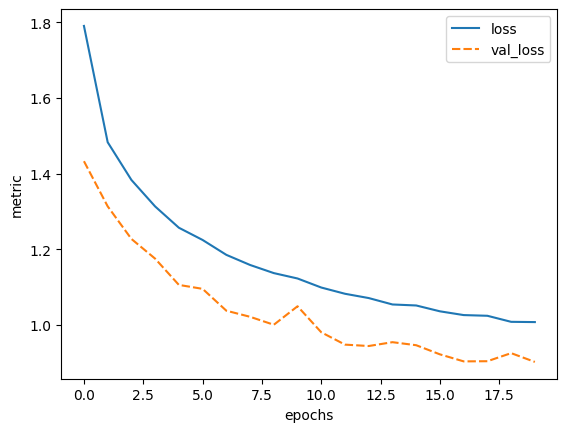

In [27]:
plot_history(history, ['loss', 'val_loss'])

In [28]:
model.save('cnn_model')

1/1 [==============================] - 0s 162ms/step


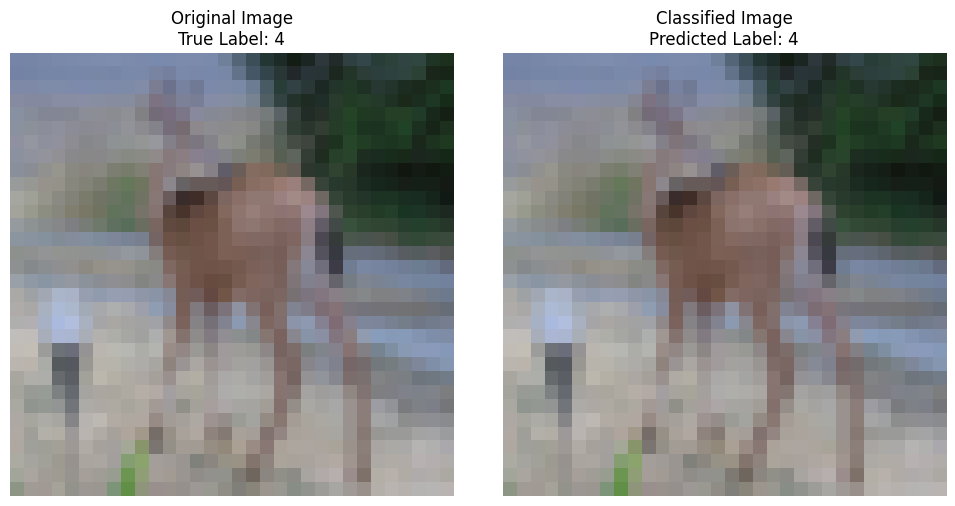

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype('float32') / 255.0


cnn_model = tf.keras.models.load_model('cnn_model')

# Select a specific image from the test set
image_index = 100
test_image = x_test[image_index]
true_label = y_test[image_index][0]

# Reshape the image to match
test_image = np.expand_dims(test_image, axis=0)


prediction = cnn_model.predict(test_image)
predicted_label = np.argmax(prediction)

# Display the test image and classified image side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show original test image
axs[0].imshow(x_test[image_index])
axs[0].set_title(f"Original Image\nTrue Label: {true_label}")
axs[0].axis('off')

# Show classified image
axs[1].imshow(x_test[image_index])
axs[1].set_title(f"Classified Image\nPredicted Label: {predicted_label}")
axs[1].axis('off')

plt.tight_layout()
plt.show()
